# Ayudantía 2 - Punto Flotante
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

# PREGUNTA 1

¿Cuantas operaciones se necesitan para computar un polinomio de grado N?

- Resuelva con y sin el método de Horner

---

# PREGUNTA 2

Dada la siguiente representación de 6 bits:


| Elemento  | [Bit] |
| --------- | ----- |
| Signo     | 1     |
| Mantisa   | 2     |
| Exponente | 3     |



### a) Cuál es el valor de $\epsilon_{machine}$ 

### b) Genere una tabla con los numeros de representación subnormal.

### c) Genere una tabla de los casos especiales $+ \infty$, $-\infty$ y $NaN$ de cuantas maneras se puede representar $NaN$.

### d) ¿Cuál es el primer número entero que no es posible almacenar con esta representación?

### e) Dé un ejemplo donde ocurra perdida de importancia. ¿Cuánta diferencia tiene que haber entre 2 números para que ocurra perdida de importancia?


Para las preguntas $b)$ y $c)$ siga este formato:

| Signo | 1 | Mantisa | Exponente | Base10      |
|-------|---|---------|-----------|-------------|
|      |  |       |        |      |

---


# PAUTA

## Pregunta 1

**SIN HORNER**

1. Forma del $P_N(X):$
$$
P_N(x) = a_0 + a_1 x^1 + a_2 x^2 + a_3 x^3 + ... + a_n x^n
$$

2. Para cada termino i-esimo de la forma $a_i x^i$ necesitmos:
- $x^i$ el cual requiere $i-1$ multiplicaciones.
- $a_i x^i$ el cual requiere 1 multiplicación.
- Lo cual da un total de $i$ multiplicaciones para el termino $i$.


3. Total de multiplicaciones:
- Para un polinomio de grado $N$ tenemos $N$ terminos en la forma $a_ix^i$.
- Así que que el total de multiplicaciones es equivalente a calcular la suma de los primeros $N$ números Naturales.
$$
Multiplicaciones = \sum_{i=1}^N = \frac{N(N+1)}{2}
$$


4. Total sumas:
- Un polonimio de grado $N$ tiene $N+1$ terminos a sumar, por lo cual necesitmos relizar $N$ sumas.


5. Total de operaciones.
$$
\frac{N(N+1)}{2} + N = \frac{N^2 + 3N}{2}
$$


**CON HORNER**

1. Forma del $P_N(X):$
$$
P_N(X) = (a_0 + x(a_1 + x(a_2 + x (... + a_N x)...)))
$$

2. Ejemplo con $P_3(X)$:
$$
P_3(X)= (a_0 + x(a_1 + x (a_2 + a_3 x)))
$$

3. Notar que la factorización de un polinomio de grado $N$ deja una estructura compuesta de $N$ parentesis a resolver.

4. Cada parentesis requiere una multiplicación y una suma

5. Total de opearaciones es:
$$
Total\;de\;parentesis \times Operaciones\;por\;parentesis = N \times 2
$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np

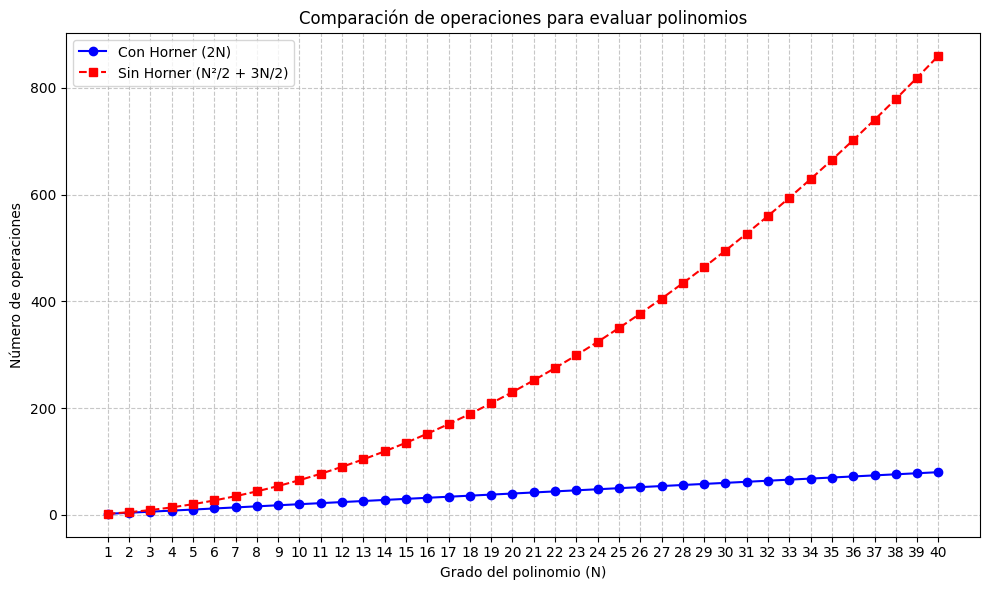

In [2]:
def operaciones_horner(N):
    return 2 * N
def operaciones_sin_horner(N):
    return (N**2 + 3 * N) / 2

N_values = np.arange(1, 41) 

horner = [operaciones_horner(n) for n in N_values]
sin_horner = [operaciones_sin_horner(n) for n in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, horner, label='Con Horner (2N)', marker='o', linestyle='-', color='blue')
plt.plot(N_values, sin_horner, label='Sin Horner (N²/2 + 3N/2)', marker='s', linestyle='--', color='red')
plt.title('Comparación de operaciones para evaluar polinomios')
plt.xlabel('Grado del polinomio (N)')
plt.ylabel('Número de operaciones')
plt.xticks(N_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Pregunta 2


### a) Cuál es el valor de $\epsilon_{machine}$ 

- Epsilon machine es igual a $2^{-bits\;en\;la\;mantisa}$ = $2^{-2} = 0.25$
- Conceptualmente es el siguiente número representable luego de $1$.

| Signo | 1 | Mantisa | Exponente | Base10      |
|-------|---|---------|-----------|-------------|
| 0     | 1 | 00      | 011       | \(1.0\)     |  
| 0     | 1 | 01      | 011       | \(1.25\)    |


### b) Genere una tabla con los numeros de representación subnormal


| Signo | 1 | Mantisa | Exponente | Base10      |
|-------|---|---------|-----------|-------------|
| 0     | 0 | 00      | 000       | **0.0**     |
| 0     | 0 | 01      | 000       | \(0.03125\) |
| 0     | 0 | 10      | 000       | \(0.0625\)  |
| 0     | 0 | 11      | 000       | \(0.09375\) |

### c) Genere una tabla de los casos especiales $+ \infty$, $-\infty$ y $NaN$ de cuantas maneras se puede representar $NaN$.

| Signo | 1 | Mantisa | Exponente | Base10      |
|-------|---|---------|-----------|-------------|
| 0     | 1 | 00      | 111       | $+ \infty$  |
| 1     | 1 | 00      | 111       | $- \infty$  |
| 0     | 1 | 01      | 111       | $NaN$       |
| 1     | 1 | 01      | 111       | $NaN$       |
| 0     | 1 | 10      | 111       | $NaN$       |
| 1     | 1 | 10      | 111       | $NaN$       |
| 0     | 1 | 11      | 111       | $NaN$       |
| 1     | 1 | 11      | 111       | $NaN$       |



### d) ¿Cuál es el primer número entero que no es posible almacenar con esta representación?

El exponente se mueve desde $2^{-3}$ a $2^3$ 

| 1| Mantisa | Exponente | Base10 |
|--|---------|-----------|--------|
| 1| 00      | $2^0$     |  1     |
| 1| 01      | $2^0$     |  1.25  |
| 1| 10      | $2^0$     |  1.5   |
| 1| 11      | $2^0$     |  1.75  |
| 1| 00      | $2^1$     |  2     |
| 1| 01      | $2^1$     |  2.5   |
| 1| 10      | $2^1$     |  3     |
| 1| 11      | $2^1$     |  3.5   |
| 1| 00      | $2^2$     |  4     |
| 1| 01      | $2^2$     |  5     |
| 1| 10      | $2^2$     |  6     |
| 1| 11      | $2^2$     |  7     |
| 1| 00      | $2^2$     |  8     |
| 1| 01      | $2^3$     |  10    |
| 1| 10      | $2^3$     |  12    |
| 1| 11      | $2^3$     |  14    |


El primer entero no representable es el 9

### e) Dé un ejemplo donde ocurra perdida de importancia. ¿Cuánta diferencia tiene que haber entre 2 números para que ocurra perdida de importancia?


1. Partamos por definir 2 números utilizando nuestra representación:
$$
X = 1.00 \times 2^2 = 4.0
$$

$$
Y = 1.00 \times 2^-1 = 0.5
$$

2. Ahora supongamos que deseamos calcular $X+Y$. Seguimos el procedimiento. Alineamos al expoenenete más significativo.
$$
\begin{split}
&1.00| \quad \;\; \times 2^2 \quad (X)\\
&0.00|100 \times 2^{2} \quad (Y)
\end{split}
$$

3. Sumar
$$
\begin{split}
&1.00| \quad \;\; \times 2^2 \quad (X)\\
&0.00|100 \times 2^{2} \quad (Y) \\
= &1.00|100 \times 2^2 \quad (X+Y)
\end{split}
$$

4. Aplicar reglas de redondeo
$$
\begin{split}
&1.00|100 \times 2^2 \quad (X+Y) \\
&1.00|\quad \;\; \times 2^2 \quad (fl(X+Y))
\end{split}
$$

5. se concluye que $fl(X+Y) \neq X+Y$

El error individual de presentacion de un número $x$ esta dado por:
$$
\frac{|fl(x)-x|}{|x|} \leq \frac{1}{2} \cdot \epsilon_m
$$

Ese es solo el error de representar el número, NO CONFUNDIR con la perdida de importancia que ocurre al operar números, por ejemplo si estamos sumando $x$ con $\delta$ se debería cumplir que:
$$
\delta \geq \epsilon_m \cdot x
$$
